In [217]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('ggplot')
plt.rcParams.update({'font.size': 22})

def SortedIndices(array): 
    return [i[0] for i in sorted(enumerate(array), key=lambda x:x[1])]

In [60]:
data = pd.read_csv("TimesRichList2020.csv",index_col=0)

In [61]:
data

,Rank,Name,Worth,Rise/Fall,Source of wealth
1,1,Sir James Dyson and family,1.620000e+10,3600000000.0,Household goods and Technology
2,2,Sri and Gopi Hinduja and family,1.600000e+10,6000000000.0,Industry and Finance
3,2,David and Simon Reuben,1.600000e+10,2664000000.0,Property and Internet
4,4,Sir Leonard Blavatnik,1.578100e+10,1411000000.0,"Investment, Music and Media"
5,5,Sir Jim Ratcliffe,1.215000e+10,6000000000.0,Chemicals
...,...,...,...,...,...
996,982,Sir Henry Angest,1.200000e+08,70000000.0,Finance
997,982,Terry Lister and family,1.200000e+08,9000000.0,Car sales
998,982,The Earl of Stockton and the Macmillan family,1.200000e+08,0,Publishing
999,982,Tony Travis and family,1.200000e+08,5000000.0,Building supplies


In [164]:
Worth = data['Worth'].values
Change = data['Rise/Fall'].values
Sectors = data['Source of wealth'].values
UniqueSectors = np.unique(Sectors)
Change = np.array([eval(Change[i].replace("New","0")) for i in range(0,Change.shape[0])]);

/home/harvey/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


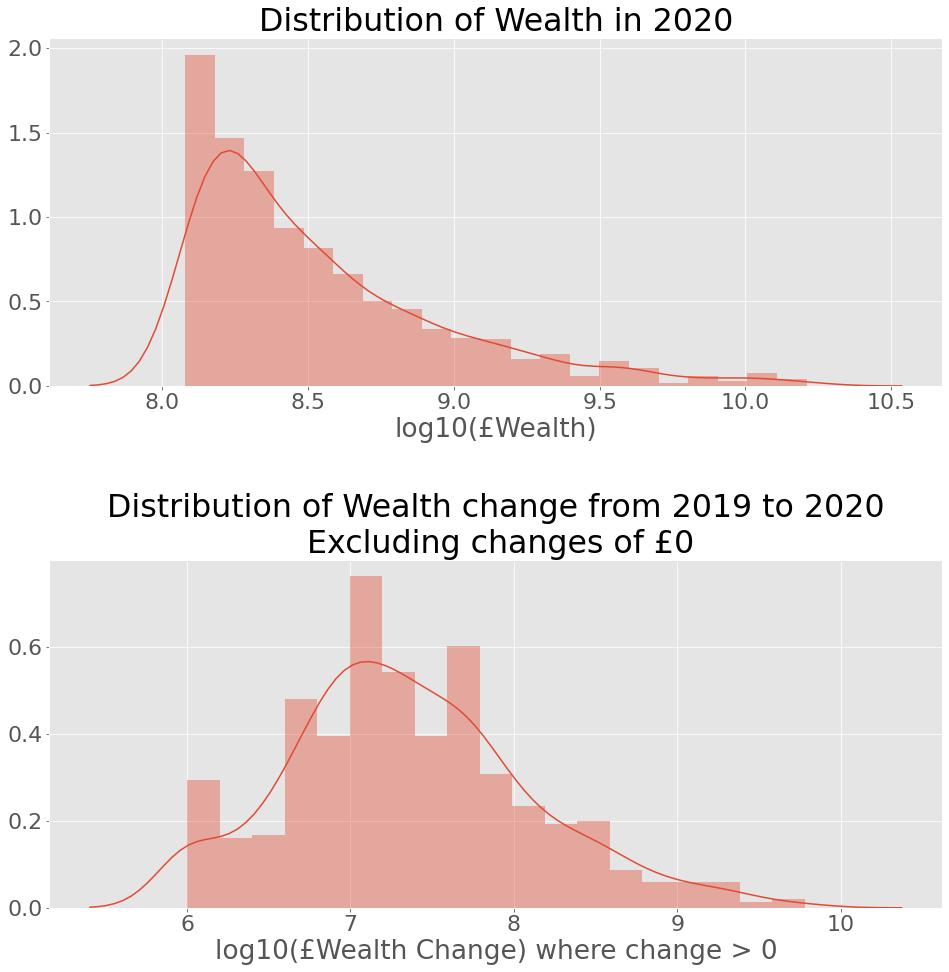

In [293]:
x = np.log10(Change);
x = x[np.where(np.isinf(x) == False)];

fig,ax = plt.subplots(nrows=2,figsize=(16, 16))
sns.distplot(np.log10(Worth),axlabel="log10(£Wealth)",ax=ax[0])
ax[0].set_title("Distribution of Wealth in 2020")

sns.distplot(x,axlabel="log10(£Wealth Change) where change > 0",ax=ax[1])
ax[1].set_title("Distribution of Wealth change from 2019 to 2020\n Excluding changes of £0")

plt.subplots_adjust(hspace=0.5)

In [312]:
WealthPerSector = np.zeros(UniqueSectors.shape[0])
ChangePerSector = np.zeros(UniqueSectors.shape[0])
MedianWealthPerSector = np.zeros(UniqueSectors.shape[0])
MedianChangePerSector = np.zeros(UniqueSectors.shape[0])
for i in range(0,UniqueSectors.shape[0]):
    WealthPerSector[i] = np.sum(Worth[np.where(Sectors==UniqueSectors[i])])
    ChangePerSector[i] = np.sum(Change[np.where(Sectors==UniqueSectors[i])])
    MedianWealthPerSector[i] = np.median(Worth[np.where(Sectors==UniqueSectors[i])])
    MedianChangePerSector[i] = np.median(Change[np.where(Sectors==UniqueSectors[i])])
    

/home/harvey/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


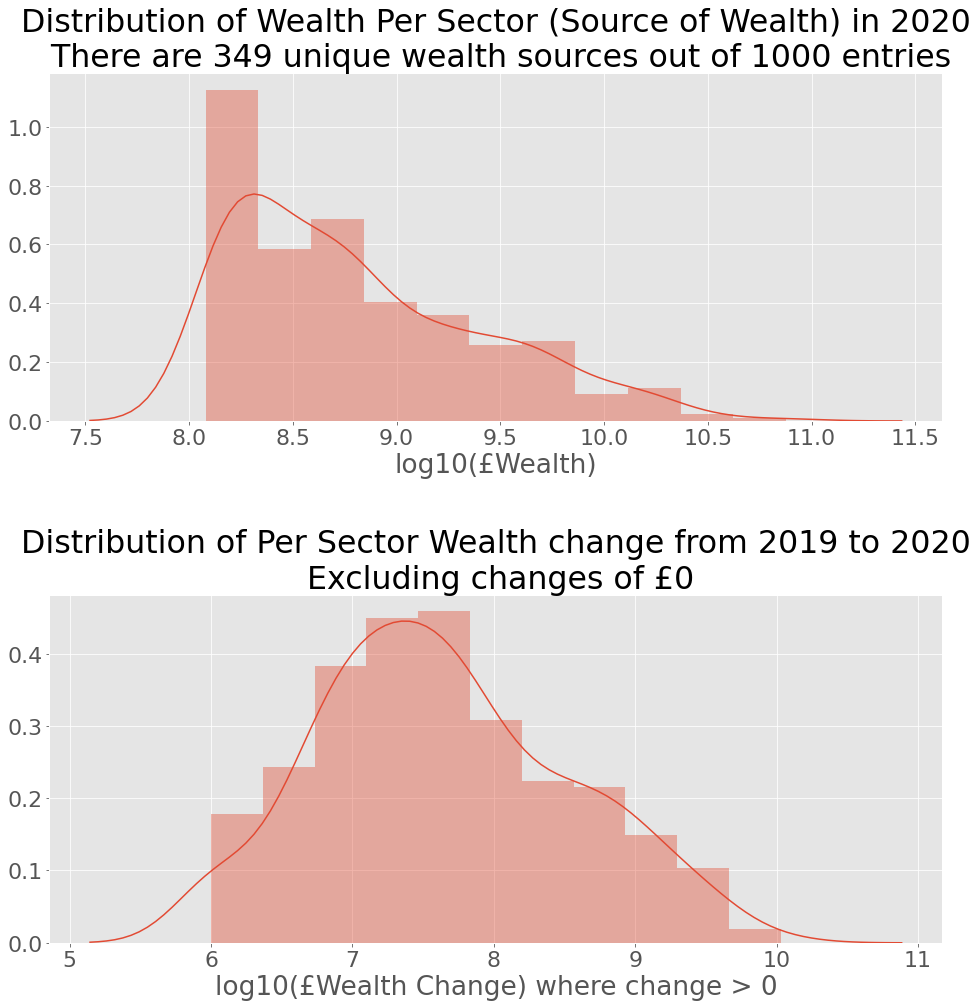

In [202]:
x = np.log10(ChangePerSector)
x = x[np.where(np.isinf(x) == False)]

fig,ax = plt.subplots(nrows=2,figsize=(16, 16))
sns.distplot(np.log10(WealthPerSector),axlabel="log10(£Wealth)",ax=ax[0])
ax[0].set_title("Distribution of Wealth Per Sector (Source of Wealth) in 2020\n There are {} unique wealth sources out of {} entries".format(UniqueSectors.shape[0],Sectors.shape[0]))

sns.distplot(x,axlabel="log10(£Wealth Change) where change > 0",ax=ax[1])
ax[1].set_title("Distribution of Per Sector Wealth change from 2019 to 2020\n Excluding changes of £0")

plt.subplots_adjust(hspace=0.5)

In [280]:
x = UniqueSectors[SortedIndices(WealthPerSector)]
y = np.sort(WealthPerSector)

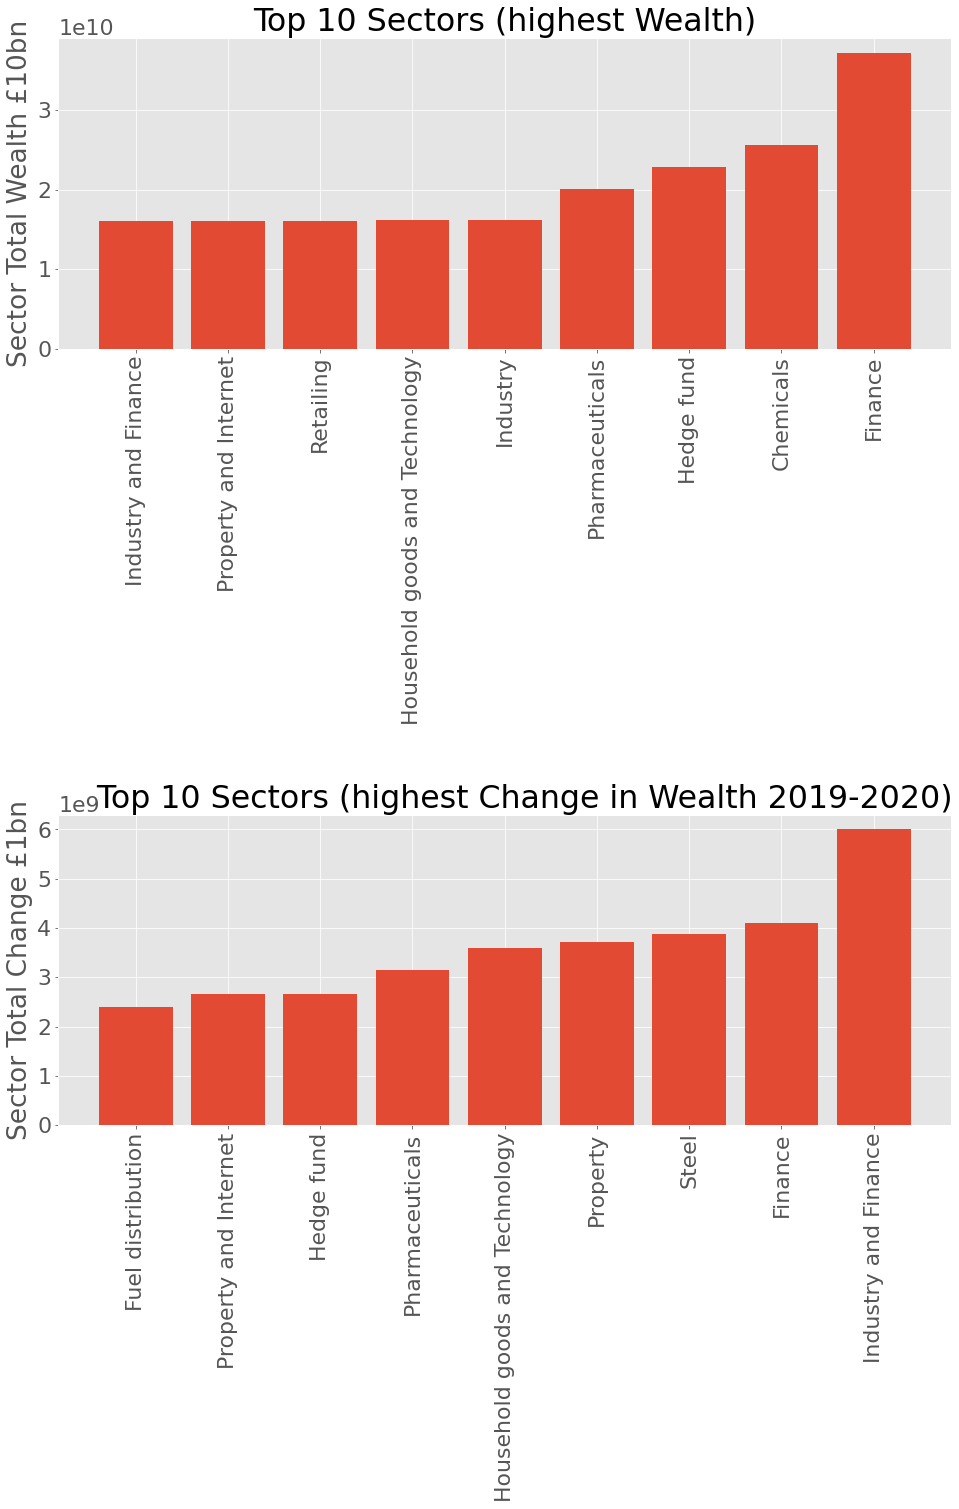

In [304]:
fig, ax = plt.subplots(nrows=2,figsize=(16,20))

x = UniqueSectors[SortedIndices(WealthPerSector)]
y = np.sort(WealthPerSector)

s = x.shape[0]-10
e = -1
ax[0].bar(x[s:e],y[s:e])
ax[0].set_xticklabels(x[s:e], rotation=90);
ax[0].set_title("Top 10 Sectors (highest Wealth)")
ax[0].set_ylabel("Sector Total Wealth £10bn")

x = UniqueSectors[SortedIndices(ChangePerSector)]
y = np.sort(ChangePerSector)

s = x.shape[0]-10
e = -1
ax[1].bar(x[s:e],y[s:e])
ax[1].set_xticklabels(x[s:e], rotation=90);
ax[1].set_title("    Top 10 Sectors (highest Change in Wealth 2019-2020)")
ax[1].set_ylabel("Sector Total Change £1bn")

plt.subplots_adjust(hspace=1.5)

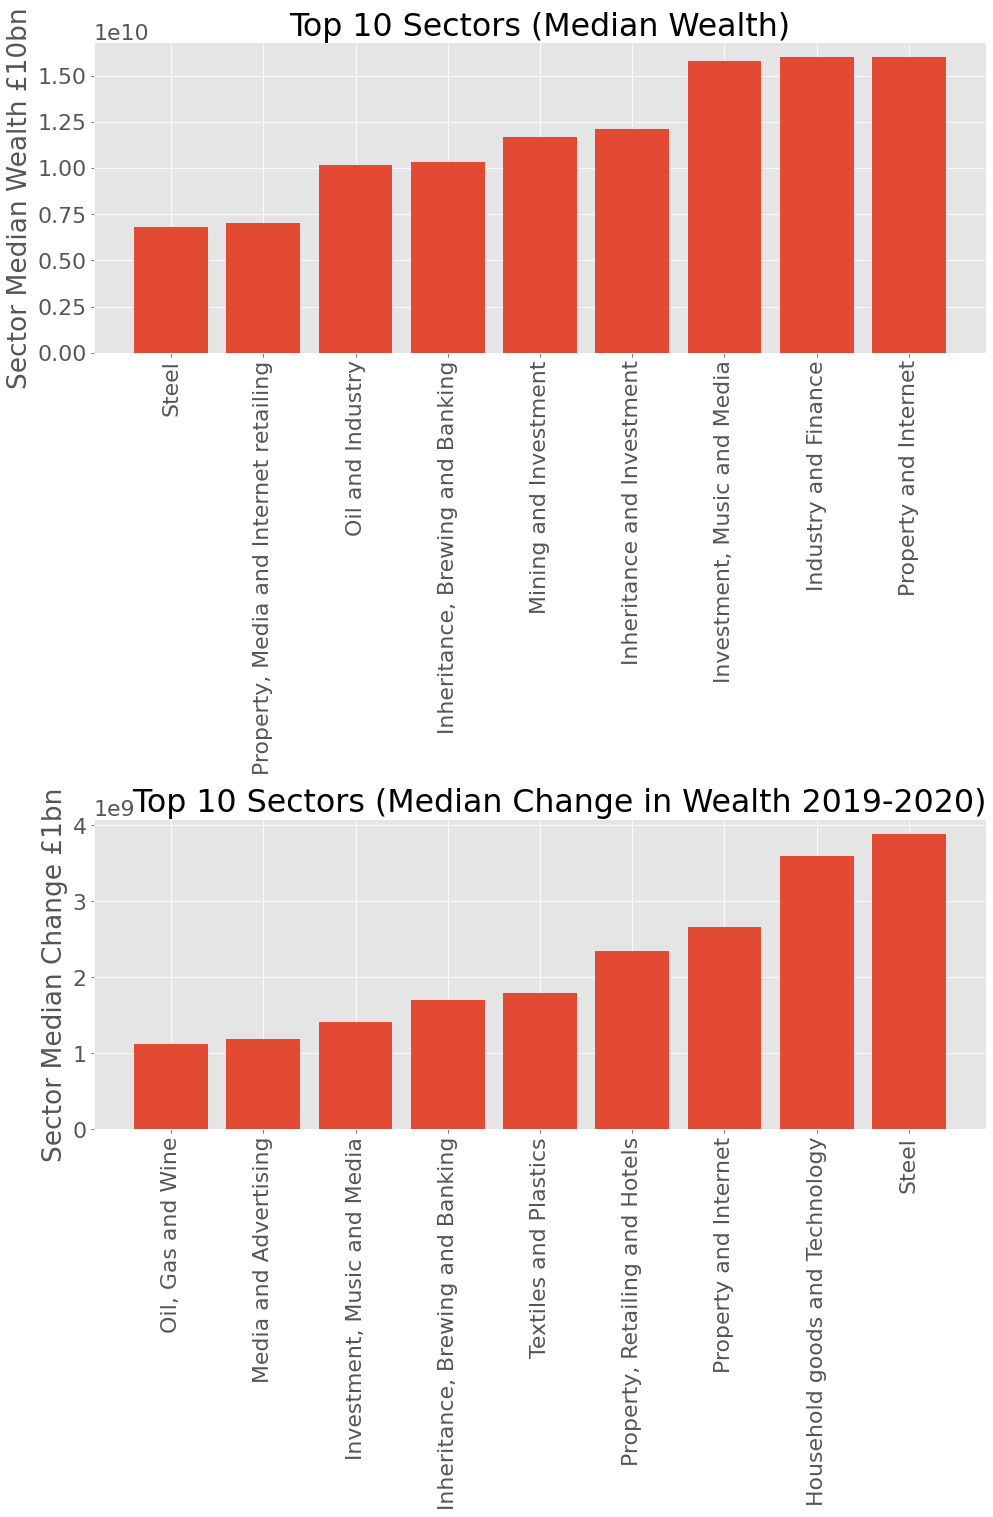

In [319]:
fig, ax = plt.subplots(nrows=2,figsize=(16,20))

x = UniqueSectors[SortedIndices(MedianWealthPerSector)]
y = np.sort(MedianWealthPerSector)

s = x.shape[0]-10
e = -1
ax[0].bar(x[s:e],y[s:e])
ax[0].set_xticklabels(x[s:e], rotation=90);
ax[0].set_title("Top 10 Sectors (Median Wealth)")
ax[0].set_ylabel("Sector Median Wealth £10bn")
x = UniqueSectors[SortedIndices(MedianChangePerSector)]
y = np.sort(MedianChangePerSector)

s = x.shape[0]-10
e = -1
ax[1].bar(x[s:e],y[s:e])
ax[1].set_xticklabels(x[s:e], rotation=90);
ax[1].set_title("    Top 10 Sectors (Median Change in Wealth 2019-2020)")
ax[1].set_ylabel("Sector Median Change £1bn")

plt.subplots_adjust(hspace=1.5)